In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
df=pd.read_csv('Dataforforcast.csv')

In [0]:
year=2021

In [0]:
for l in range(3):    
    
    #calculating employment with respect to year

    emp=[]
    for x1 in range(0,10):
        emp1= df[["Year"]]
        emp_y=df["Employed"]
        reg1=linear_model.LinearRegression()
        reg1.fit(emp1,emp_y)
        from sklearn.model_selection import train_test_split
        x_train1,x_test1,y_train1,y_test1=train_test_split(emp1,emp_y,train_size=0.8,test_size=0.2)
        reg1.fit(x_train1,y_train1)
        pred_emp=reg1.predict([[year]])
        emp.extend(pred_emp)

    emp_min=min(emp)
    emp_max=max(emp)


    #print("The value of min employment:",emp_min,"\n The value of max employment:",emp_max)

    #calculating unemployment with respect to year

    unemp=[]
    for x1 in range(0,10):
        unemp1= df[["Year"]]
        unemp_y=df["Unemployed"]
        reg2=linear_model.LinearRegression()
        reg2.fit(unemp1,unemp_y)
        from sklearn.model_selection import train_test_split
        x_train2,x_test2,y_train2,y_test2=train_test_split(unemp1,unemp_y,train_size=0.8,test_size=0.2)
        reg2.fit(x_train2,y_train2)
        pred_unemp=reg2.predict([[year]])
        unemp.extend(pred_unemp)

    unemp_min=min(unemp)
    unemp_max=max(unemp)

    #calculating Train with respect to year

    trn=[]
    for x in range(0,10):
        trn1= df[["Year"]]
        trn_y=df["Train"]
        reg3=linear_model.LinearRegression()
        reg3.fit(trn1,trn_y)
        from sklearn.model_selection import train_test_split
        x_train3,x_test3,y_train3,y_test3=train_test_split(trn1,trn_y,train_size=0.8,test_size=0.2)
        reg3.fit(x_train3,y_train3)
        pred_trn=reg3.predict([[year]])
        trn.extend(pred_trn)

    trn_min=min(trn)
    trn_max=max(trn)
    #print("The value of min Train:",trn_min,"\n The value of max Train:",trn_max)

    #calculating dweling with respect to Employment and train with all minimum values

    dwel_min=[]
    for x in range(0,10):
        d1= df[["Employed","Train"]]
        d_y=df["Dwellings"]
        reg4=linear_model.LinearRegression()
        reg4.fit(d1,d_y)
        from sklearn.model_selection import train_test_split
        x_train4,x_test4,y_train4,y_test4=train_test_split(d1,d_y,train_size=0.8,test_size=0.2)
        reg4.fit(x_train4,y_train4)
        pred_d=reg4.predict([[round(emp_min),round(trn_min)]])
        dwel_min.extend(pred_d)

    d_min=min(dwel_min)
    d_max=max(dwel_min)
    #print("The value of min Min Dwel:",d_min,"\n The value of max Min dwel:",d_max)

    #calculating dweling with respect to Employment and train with all maximum values

    dwel_max=[]
    for x in range(0,10):
        d2= df[["Employed","Train"]]
        d2_y=df["Dwellings"]
        reg5=linear_model.LinearRegression()
        reg5.fit(d2,d2_y)
        from sklearn.model_selection import train_test_split
        x_train5,x_test5,y_train5,y_test5=train_test_split(d2,d2_y,train_size=0.8,test_size=0.2)
        reg5.fit(x_train5,y_train5)
        pred_d2=reg5.predict([[round(emp_max),round(trn_max)]])
        dwel_max.extend(pred_d2)

    d2_min=min(dwel_max)
    d2_max=max(dwel_max)

    #calculating population with respect to Dwellings,Employed,Unemployed,Train with all minimum values
    #consider min value of dwel is 3155 which is the output of dwel with all min values and the output is min 

    Actual_Pop=[]
    for x in range(0,10):
        p= df[["Dwellings","Employed","Unemployed","Train"]]
        p_y=df["Population"]
        reg6=linear_model.LinearRegression()
        reg6.fit(p,p_y)
        from sklearn.model_selection import train_test_split
        x_train6,x_test6,y_train6,y_test6=train_test_split(p,p_y,train_size=0.8,test_size=0.2)
        reg6.fit(x_train6,y_train6)
        pred_p=reg6.predict([[round(d_min),round(emp_min),round(unemp_min),round(trn_min)]])
        Actual_Pop.extend(pred_p)

    p_min=min(Actual_Pop)
    p_max=max(Actual_Pop)
  
    #calculating population with respect to Dwellings,Employed,Unemployed,Train with all maximun values
    #consider min value of dwel is 3455 which is the output of dwel with all max values and the output is min 

    Actual_Pop1=[]
    for x in range(0,10):
        p1= df[["Dwellings","Employed","Unemployed","Train"]]
        p1_y=df["Population"]
        reg7=linear_model.LinearRegression()
        reg7.fit(p1,p1_y)
        from sklearn.model_selection import train_test_split
        x_train7,x_test7,y_train7,y_test7=train_test_split(p1,p1_y,train_size=0.8,test_size=0.2)
        reg7.fit(x_train7,y_train7)
        pred_p1=reg7.predict([[round(d2_max),round(emp_max),round(unemp_max),round(trn_max)]])
        Actual_Pop1.extend(pred_p1)

    p1_min=min(Actual_Pop1)
    p1_max=max(Actual_Pop1)
    #print("The value of min Max pop1:",p1_min,"\n The value of max max pop1:",p1_max)

    df=df.append({'Year' : year , 'Population' : p_min,'Dwellings':d_min,'Employed':emp_min,"Unemployed":unemp_min,"Train":trn_min} , ignore_index=True)
    #df4=pd.append({'Year' : year , 'Population' : p1_max,'Dwellings':d2_max,'Employed':emp_max,"Unemployed":unemp_max,"Train":trn_max} , ignore_index=True)
    year=year+5

In [12]:
df

,Year,Population,Dwellings,Employed,Unemployed,Train
0,2001.0,4940.000000,2515.000000,1727.000000,112.000000,74.000000
1,2006.0,4952.000000,2541.000000,2183.000000,126.000000,113.000000
2,2011.0,5309.000000,2747.000000,2360.000000,138.000000,138.000000
3,2016.0,5769.000000,3072.000000,2478.000000,145.000000,184.000000
4,2021.0,5889.774002,3154.786115,2635.333333,155.333333,204.333333
5,2026.0,6168.238064,3349.511071,2782.833333,164.833333,236.333333
6,2031.0,6428.922409,3532.447394,2930.333333,173.500000,266.816667


# **Visualizations**

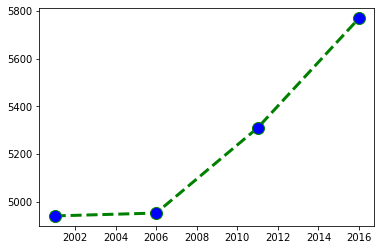

In [15]:
plt.plot(df[['Year']],df[['Population']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Year and Population. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 

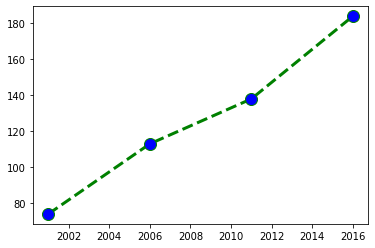

In [16]:
plt.plot(df[['Year']],df[['Train']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Year and Number of people travelling by Train. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 

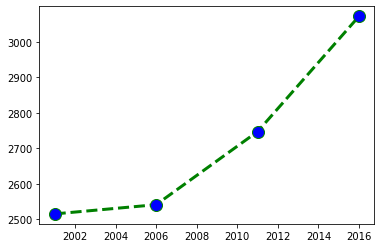

In [18]:
plt.plot(df[['Year']],df[['Dwellings']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Year and Dwellings. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 

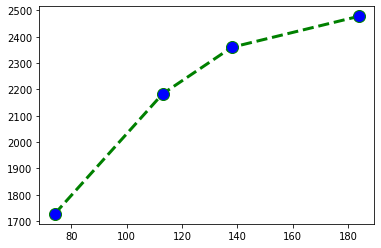

In [21]:
plt.plot(df[['Train']],df[['Employed']] , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12)

The data shows an uphill trend as it moves from left to right.
 
 This indicates that there is a positive relationship between Number of people travelling by train and Number of people employed. 
 
 There is a strong assocaition between the two variables. 
 
 Outliers are not present. 